In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Machine Learning

Machine Learning (ML) is a branch of artificial intelligence (AI) that focuses on building systems that learn from and make decisions based on data. Unlike traditional programming, where the logic and rules are explicitly defined by programmers, ML algorithms learn patterns from data, enabling the system to make predictions or decisions without being explicitly programmed to perform the task. This ability to learn and improve from experience makes ML a powerful tool for a wide range of applications, including image recognition, natural language processing, and predictive analytics.


## Perceptrons

The perceptron is a fundamental building block in neural networks, representing the simplest form of a neural network used for binary classification tasks. It was invented by Frank Rosenblatt in 1957 and can be seen as the simplest type of feedforward neural network: a linear classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

### Mathematical Model

The function of a perceptron can be described by the following formula:

$$
f(x) = 
\begin{cases} 
1 & \text{ if } w \cdot x + b > 0 \\
0 & \text{ otherwise}
\end{cases}
$$

Where:
- $x$ is the input feature vector.
- $w$ is the weight vector associated with the features.
- $b$ is the bias, which adjusts the boundary away from the origin without depending on the input value.
- $w \cdot x$ is the dot product of $w$ and $x$.

### Weight Update Rule

The perceptron learning algorithm updates the weights and biases based on the outcome of each prediction. This rule is applied iteratively over all training samples, allowing the perceptron to learn from the data.

Given a training example with input vector $x_i$ and true label $y_i$ (where $y_i$ can be either 0 or 1 for binary classification tasks), the weight update rule is as follows:

$$
w_{new} = w_{old} + \Delta w
$$

$$
b_{new} = b_{old} + \Delta b
$$

Where the updates $\Delta w$ and $\Delta b$ are calculated as:

$$
\Delta w = \alpha (y_i - \hat{y}_i) x_i
$$

$$
\Delta b = \alpha (y_i - \hat{y}_i)
$$

- $\alpha$ is the learning rate, a small positive scalar that determines the step size of the update.
- $\hat{y}_i$ is the predicted label by the perceptron, which is 1 if $w \cdot x_i + b > 0$ and 0 otherwise.

The learning rate $\alpha$ controls how much we adjust the weights with respect to the loss gradient. Smaller values mean smaller adjustments, making the learning process more gradual but potentially requiring more iterations to converge. This update rule is applied repeatedly for each training sample across multiple epochs, or passes through the dataset, until the model's performance reaches a satisfactory level or stops improving.


In [70]:
import numpy as np
import matplotlib.pyplot as plt

class PerceptronSingleWeight:
    def __init__(self, learning_rate=0.01, n_iterations=10):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weight = 0
        self.bias = 0
        # Trackers for weights and biases over iterations
        self.weights_history = []
        self.biases_history = []

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for x_i, y_i in zip(X, y):
                linear_output = self.weight * x_i + self.bias
                y_predicted = self._step_function(linear_output)
                update = self.learning_rate * (y_i - y_predicted)
                self.weight += update * x_i
                self.bias += update
                # Tracking the history of weights and biases
                self.weights_history.append(self.weight)
                self.biases_history.append(self.bias)

    def _step_function(self, x):
        return np.where(x > 0, 1, 0)
    

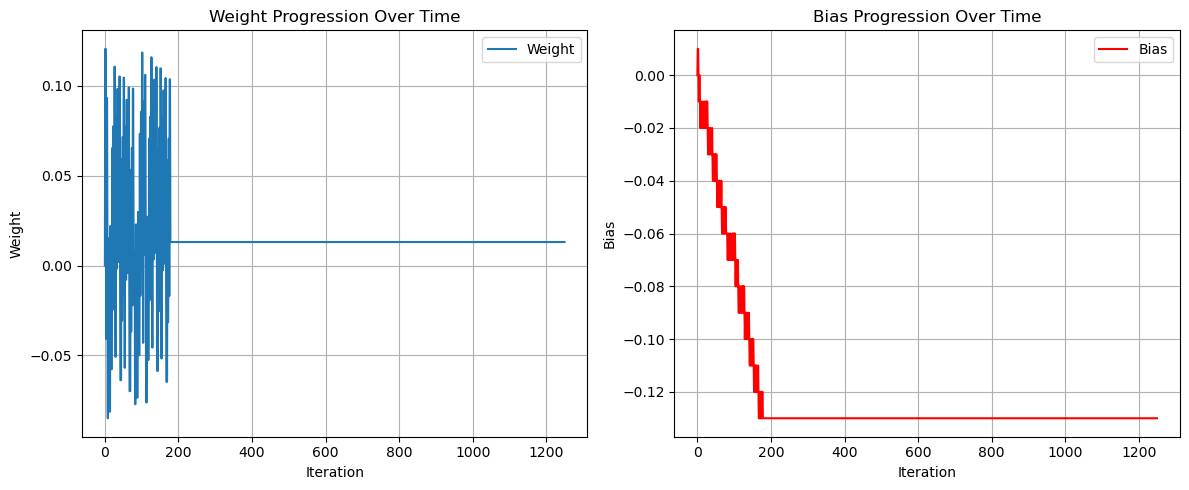

In [75]:

# Generate and visualize dummy data for a single feature
X_single = (2 * np.random.randn(25)) + 10  # Single feature
y_single = np.array([1 if x > 10 else 0 for x in X_single])  # Labels

# Initialize and train the perceptron
p = PerceptronSingleWeight(learning_rate=0.01, n_iterations=50)
p.fit(X_single, y_single)

# At this point, p.weights_history and p.biases_history contain the tracking information
# You can plot these using matplotlib to visualize the progression of weight and bias

# Example for plotting (you can run these lines in your environment):
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(p.weights_history, label='Weight')
plt.title('Weight Progression Over Time')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(p.biases_history, label='Bias', color='red')
plt.title('Bias Progression Over Time')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


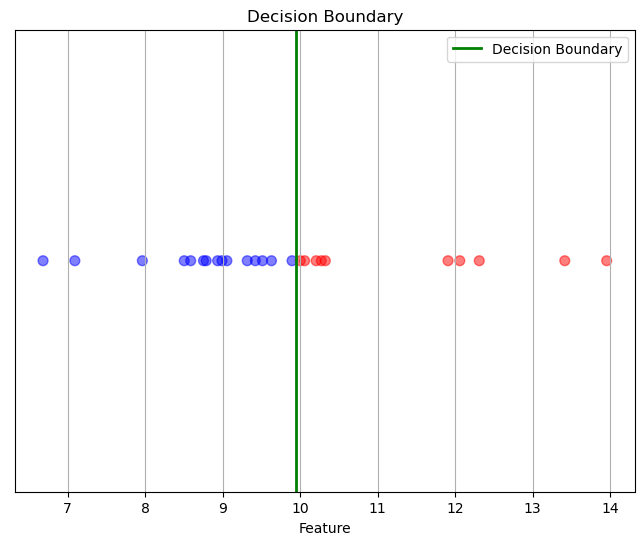

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(X_single, np.zeros_like(X_single), c=y_single, cmap='bwr', alpha=0.5, s=50)  # Use a different size for visibility
db_x = -p.bias / p.weight if p.weight != 0 else 0
plt.axvline(x=db_x, color='g', label='Decision Boundary', linewidth=2)  # Make the decision boundary line thicker for better visibility
plt.title('Decision Boundary')
plt.xlabel('Feature')
plt.yticks([])
plt.legend()
plt.grid(True)  
plt.show()

# Feedforward Process in a Perceptron

The perceptron is a type of artificial neuron or the simplest form of a neural network. It's designed to classify its inputs into one of two categories (0 or 1, for example) and is the foundation of more complex neural network architectures. The feedforward process in a perceptron is straightforward and follows a linear approach.

## How Feedforward Works in a Perceptron

1. **Input**: The perceptron receives inputs \(x_1, x_2, ..., x_n\) each associated with a weight \(w_1, w_2, ..., w_n\). These inputs can represent features of an object or elements of a dataset.

2. **Weighted Sum**: It calculates the weighted sum of the inputs, adding a bias term \(b\). The bias allows the activation threshold to shift left or right, which can be critical for successful learning.

3. **Activation**: The perceptron applies an activation function to this weighted sum. For a basic perceptron, this is typically a step function that outputs either 1 (if the weighted sum plus bias is above a certain threshold) or 0 (if it's below).

## Mathematical Representation

The operation of a perceptron can be mathematically represented as follows:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

Where:
- \(x_i\) represents each input value to the perceptron.
- \(w_i\) represents the weight associated with each input.
- \(b\) is the bias term.
- \(f\) is the activation function, which for a basic perceptron is the step function defined as:

$$
f(x) = 
\begin{cases} 
1 & \text{ if } x > 0 \\
0 & \text{ otherwise}
\end{cases}
$$

The output \(y\) is the classification result of the perceptron, based on the given inputs, weights, and bias. This simple model serves as the building block for more complex neural network architectures that consist of multiple layers of perceptrons (or more advanced neurons), enabling the network to learn and make predictions about more complex data.


In [77]:
import numpy as np

def feed_forward(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Example inputs, weights, and bias
inputs = np.array([1.5, -2.0, 3.0])
weights = np.array([0.5, 0.25, -0.75])
bias = 1.0

# Feed forward calculation
output = feed_forward(inputs, weights, bias)
print("Output of the feed-forward computation:", output)

Output of the feed-forward computation: -1.0


# Activation Functions in Neural Networks

Activation functions play a pivotal role in neural networks by determining the output of a neural network model. They introduce non-linearity into the network, which is essential for learning complex patterns in the data. Without activation functions, a neural network would essentially become a linear regression model, limiting its ability to solve complex problems.

The choice of the activation function affects the network's ability to converge (reach the best solution) and how quickly it can do so. Different functions have different characteristics. For instance, some are better suited for certain types of problems and network architectures. Activation functions also help in controlling the output range of the neural network, which can be crucial depending on the application, such as classification or regression tasks.

Here are some of the most commonly used activation functions in neural networks:


1. **Linear Activation Function**: It is the simplest form of activation function, essentially multiplying the input by a constant. It's represented as:
   $$Linear(x) = ax$$

2. **Step Function**: Acts as a threshold operator, turning the neuron's output from off to on depending on whether the input exceeds a certain threshold. It's defined as:
   $$Step(x) = 
   \begin{cases} 
   1 & \text{ if } x > 0 \\
   0 & \text{ otherwise}
   \end{cases}$$

3. **Sigmoid Function**: Useful for predicting probabilities as outputs since its range is between 0 and 1. Often used in the output layer of binary classification problems.
   $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

4. **Hyperbolic Tangent Function (tanh)**: Outputs values between -1 and 1, making it zero-centered and helping with the convergence during training.
   $$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

5. **Rectified Linear Unit (ReLU)**: The most widely used activation function in deep learning models, it introduces non-linearity without affecting the receptive fields of convolutional layers.
   $$ReLU(x) = \max(0, x)$$

6. **Leaky Rectified Linear Unit (Leaky ReLU)**: Addresses the "dying ReLU" problem by allowing a small, non-zero gradient when the unit is not active.
   $$LeakyReLU(x) = \max(0.01 x, x)$$

Understanding these functions and their characteristics is crucial for designing effective neural network models that can learn from complex datasets and perform a wide range of tasks, from image and speech recognition to natural language processing and beyond.


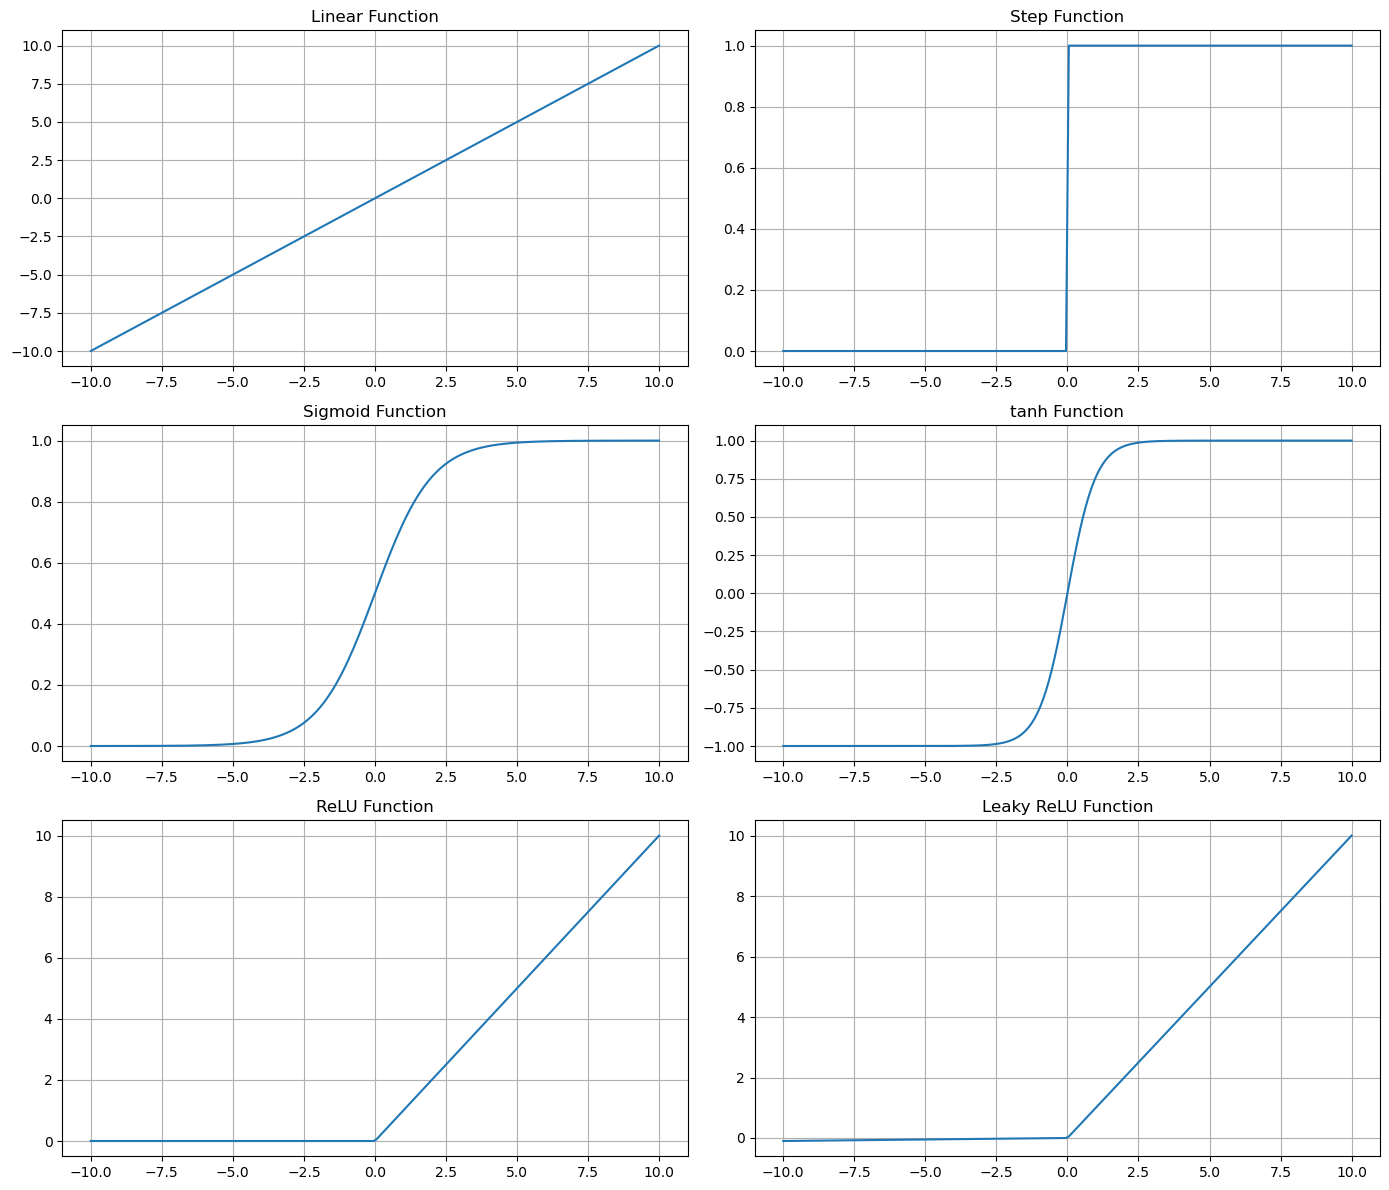

In [78]:
def linear(x, a=1):
    return a * x

def step(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

# Prepare the plot
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Adjusted for additional functions
x = np.linspace(-10, 10, 200)

# Linear
axes[0, 0].plot(x, linear(x))
axes[0, 0].set_title('Linear Function')
axes[0, 0].grid(True)

# Step
axes[0, 1].plot(x, step(x))
axes[0, 1].set_title('Step Function')
axes[0, 1].grid(True)

# Sigmoid
axes[1, 0].plot(x, sigmoid(x))
axes[1, 0].set_title('Sigmoid Function')
axes[1, 0].grid(True)

# tanh
axes[1, 1].plot(x, tanh(x))
axes[1, 1].set_title('tanh Function')
axes[1, 1].grid(True)

# ReLU
axes[2, 0].plot(x, relu(x))
axes[2, 0].set_title('ReLU Function')
axes[2, 0].grid(True)

# Leaky ReLU
axes[2, 1].plot(x, leaky_relu(x))
axes[2, 1].set_title('Leaky ReLU Function')
axes[2, 1].grid(True)

# Display the plot with titles
plt.tight_layout()
plt.show()


## Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It's one of the simplest and most commonly used techniques for predictive modeling.

### Mathematical Model

The linear regression model can be represented as:

$$
y = wx + b
$$

Where:
- $y$ is the dependent variable (target).
- $x$ is the independent variable (feature).
- $w$ is the slope of the line (weight).
- $b$ is the y-intercept of the line (bias).

### Objective

The goal of linear regression is to find the values of $w$ and $b$ that minimize the difference between the predicted outputs and the actual outputs in the training data. This difference is quantified using a cost function, such as the Mean Squared Error (MSE):

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where:
- $N$ is the number of observations.
- $y_i$ is the actual value of the $i^{th}$ observation.
- $\hat{y}_i$ is the predicted value for the $i^{th}$ observation.


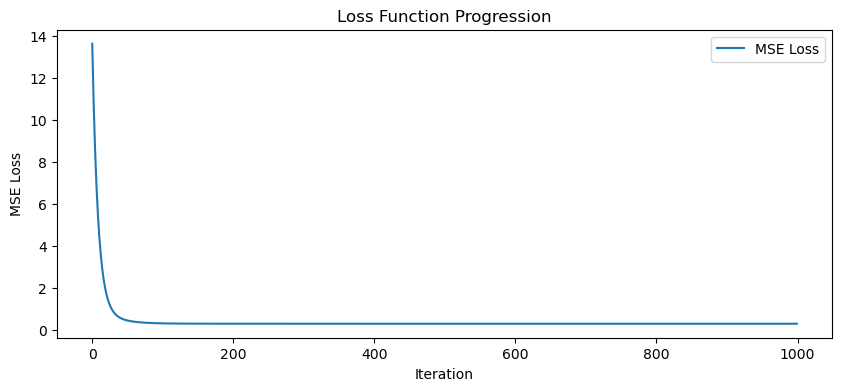

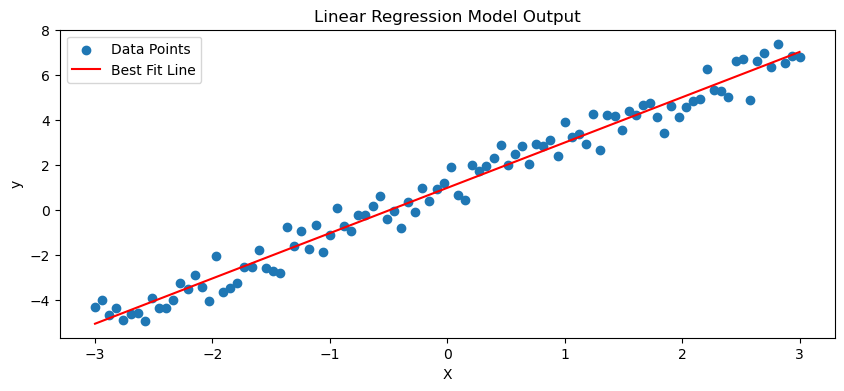

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Implementation
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weight = 0
        self.bias = 0
        self.loss_history = []

    def fit(self, X, y):
        n_samples = len(X)
        for _ in range(self.n_iterations):
            y_predicted = self.weight * X + self.bias
            loss = np.mean((y - y_predicted) ** 2)
            self.loss_history.append(loss)
            dw = (-2/n_samples) * np.dot(X.T, (y - y_predicted))
            db = (-2/n_samples) * np.sum(y - y_predicted)
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return self.weight * X + self.bias

# Generating synthetic data for Linear Regression
X = np.linspace(-3, 3, 100)
y = 2 * X + 1 + np.random.randn(*X.shape) * 0.5  # True equation is y = 2x + 1

# Training the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

# Plotting Loss Function Progression
plt.figure(figsize=(10, 4))
plt.plot(model.loss_history, label='MSE Loss')
plt.title('Loss Function Progression')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Plotting Weight and Bias Progression (Optional, requires tracking weight and bias separately)

# Plotting the Final Model Output
plt.figure(figsize=(10, 4))
plt.scatter(X, y, label='Data Points')
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Best Fit Line')
plt.title('Linear Regression Model Output')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Logistic Regression

Logistic regression is used for binary classification problems. It predicts the probability that a given input belongs to a particular category.

### Mathematical Model

The logistic regression model applies the sigmoid function to the linear regression output to obtain a probability value between 0 and 1:

$$
\hat{y} = \sigma(wx + b) = \frac{1}{1 + e^{-(wx + b)}}
$$

Where:
- $\hat{y}$ is the predicted probability.
- $\sigma$ is the sigmoid function.

### Objective

The goal is to find $w$ and $b$ that minimize the cost function, which is often the Binary Cross-Entropy:

$$
J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$


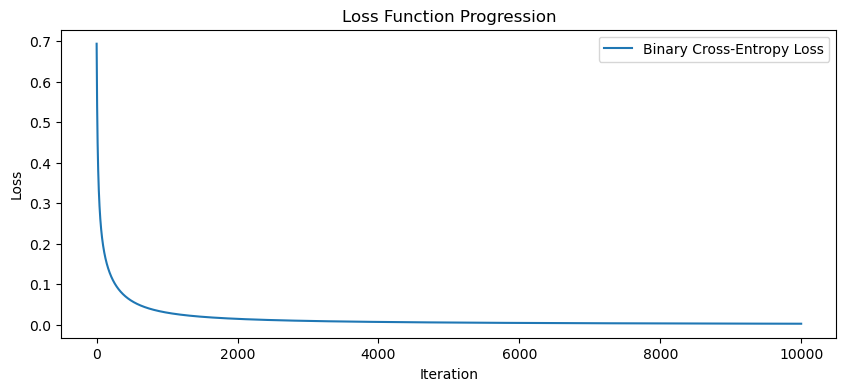

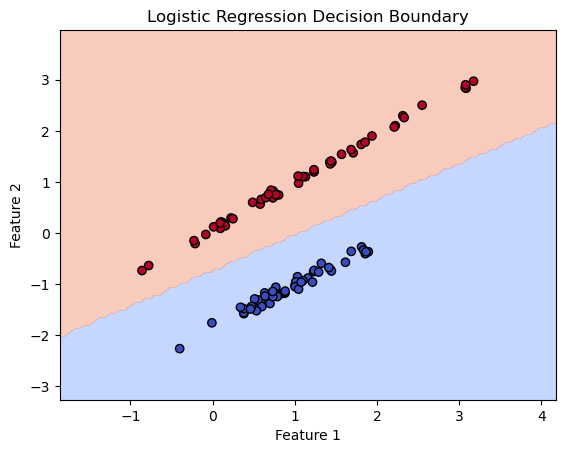

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(model)
            loss = (-1/n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.loss_history.append(loss)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Generating a synthetic dataset with 2 features for Logistic Regression
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Training the logistic regression model
model = LogisticRegression(learning_rate=0.1, n_iterations=10000)
model.fit(X, y)

# Plotting Loss Function Progression
plt.figure(figsize=(10, 4))
plt.plot(model.loss_history, label='Binary Cross-Entropy Loss')
plt.title('Loss Function Progression')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to plot decision boundary for Logistic Regression
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0, 1], cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting the Final Model Output and Decision Boundary
plot_decision_boundary(X, y, model)